In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

We want to predict the final grade for high school students.  Lets do some exploratory data analysis to pick some variables to model with.

In [31]:
data = pd.read_csv('student-mat.csv')
df = pd.DataFrame(data)
print(df.info())
print(df.shape)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

We have a dataset with 395 entries, 33 variables, and no null values.  Since we are predicting the final grade *G3* let's take a look at it's distribution.

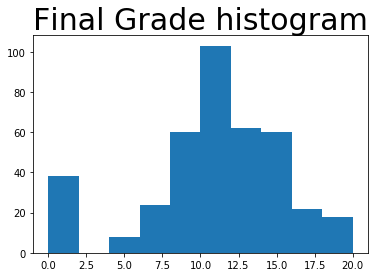

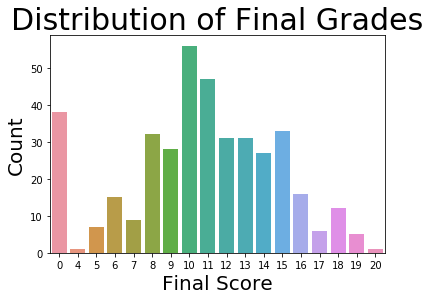

In [34]:
# check the final grade distribution
plt.hist(df.G3)
plt.title('Final Grade histogram', fontsize=30)
plt.show()

sns.countplot(df.G3)
plt.xlabel('Final Score', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Final Grades', fontsize=30)
plt.show()



The distribution appears to be normal with the exception that there are quite a few scores of 0.  Since there are no null values in our dataset it may be that these 0 values represent students who did not take the exam.

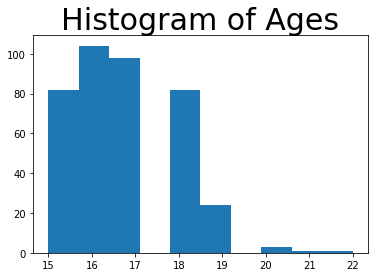

The number of males: 208
The number of females: 187


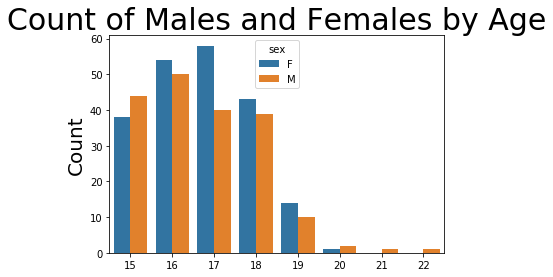

In [44]:
plt.hist(df.age)
plt.title('Histogram of Ages', fontsize=30)
plt.show()


print("The number of males: {}\nThe number of females: {}".format(df.sex.value_counts()[0], df.sex.value_counts()[1]))
sns.countplot(x=df.age, hue=df.sex)
plt.xlabel('')
plt.ylabel('Count', fontsize=20)
plt.title('Count of Males and Females by Age', fontsize=30)
plt.show()

We can see that the males and females are pretty evenly distributed, especially within the range 15-19.  Above 19 most likely will be considered outliers.  Maybe we can group the ages above 19 together.  Now let's look to see how the age and sex effect thet final grade.

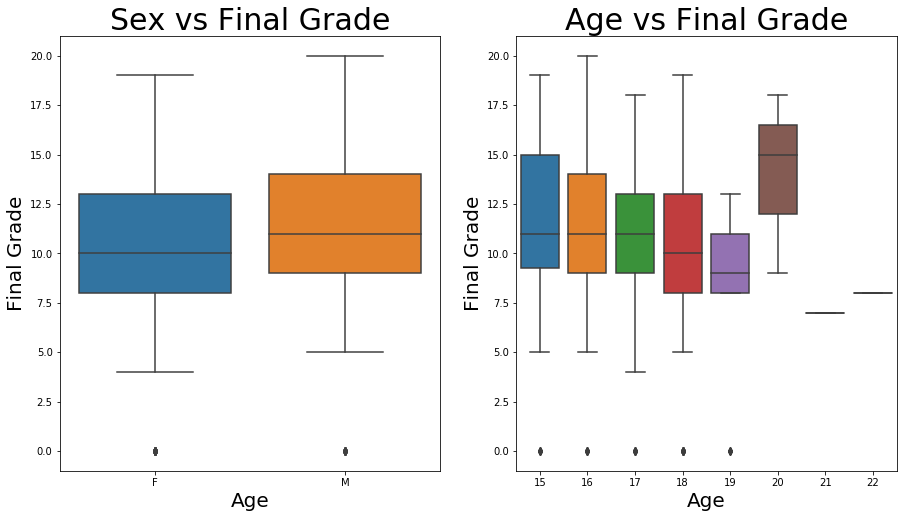

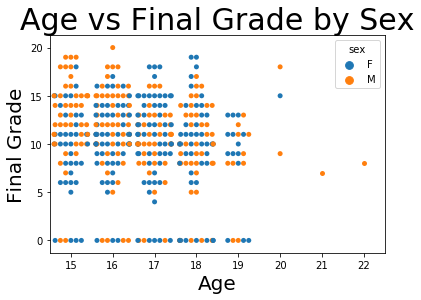

T-stat for male vs female on final grade: 2.061992815503971
P-value for male vs female on final grade 0.039865332341527636
----------------------------------------
T-stat for male vs female on final grade at age 15: 3.303853392586221 
P-value for male vs female on final grade at age 15: 0.00142806693209743
----------------------------------------
T-stat for male vs female on final grade at age 16: 1.2200145280379078 
P-value for male vs female on final grade at age 16: 0.22527265530758878
----------------------------------------
T-stat for male vs female on final grade at age 17: -0.5738257528771363 
P-value for male vs female on final grade at age 17: 0.5674276973005108
----------------------------------------
T-stat for male vs female on final grade at age 18: 0.42278781092195516 
P-value for male vs female on final grade at age 18: 0.6735843672594912
----------------------------------------
T-stat for male vs female on final grade at age 19: -0.18329545618595602 
P-value for male vs

c:\users\cmiller\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\cmiller\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\cmiller\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\cmiller\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\cmiller\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [86]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(121)
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Sex vs Final Grade', fontsize = 30)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Final Grade', fontsize = 20)

fig.add_subplot(122)
sns.boxplot(x='age', y='G3', data=df)
plt.title('Age vs Final Grade', fontsize = 30)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Final Grade', fontsize = 20)
plt.show()
sns.swarmplot(x='age', y='G3',hue='sex', data=df)
plt.title('Age vs Final Grade by Sex', fontsize = 30)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Final Grade', fontsize = 20)
plt.show()
t,p = stats.ttest_ind(df[df.sex=='M']['G3'], df[df.sex=='F']['G3'])
print('T-stat for male vs female on final grade: {}\nP-value for male vs female on final grade {}'.format(t,p))
print(40*'-')
for i in sorted(df.age.unique()):
    t,p = stats.ttest_ind(df[((df.sex=='M') & (df.age==i))]['G3'], df[((df.sex=='F') & (df.age==i))]['G3'])
    print('T-stat for male vs female on final grade at age '+str(i)+': {}'.format(t),'\nP-value for male vs female on final grade at age '+str(i)+': {}'.format(p))
    print(40*'-')

While we can see that the average test scores for males being higher than females is statistically significant, mainly due to the age 15 group, there isn't any clear relationship between age and final grade.  Let's find some variables that do tell us something about the final grades.

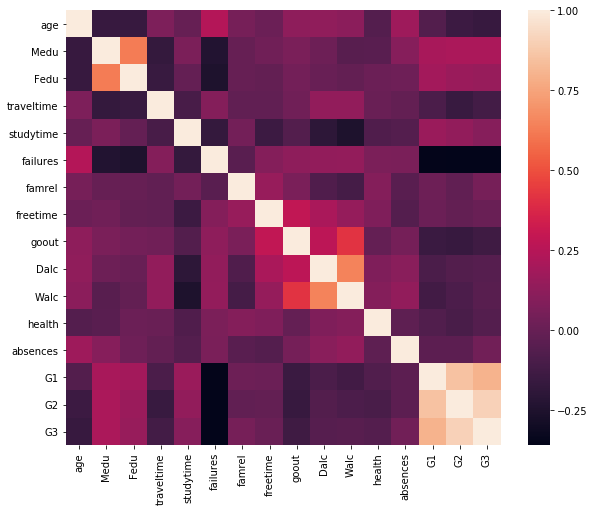

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64


In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, square=True)
plt.show()
fullcorr = df.corr()['G3'].abs().sort_values(ascending=False)
print(fullcorr)


This correlation plot and list of correlations to the output variable are only for the numeric variables.  Let's attempt to use pd.get_dummies() to create a dummy dataframe to compare the categorical variables as well.

romantic_no      romantic_yes         1.000000
higher_no        higher_yes           1.000000
sex_F            sex_M                1.000000
famsup_no        famsup_yes           1.000000
address_R        address_U            1.000000
schoolsup_no     schoolsup_yes        1.000000
famsize_GT3      famsize_LE3          1.000000
Pstatus_A        Pstatus_T            1.000000
nursery_no       nursery_yes          1.000000
school_GP        school_MS            1.000000
paid_no          paid_yes             1.000000
activities_no    activities_yes       1.000000
internet_no      internet_yes         1.000000
G2               G3                   0.904868
G1               G2                   0.852118
guardian_father  guardian_mother      0.812592
G1               G3                   0.801468
Fjob_other       Fjob_services        0.690275
Dalc             Walc                 0.647544
Medu             Fedu                 0.623455
reason_course    reason_home          0.470158
             

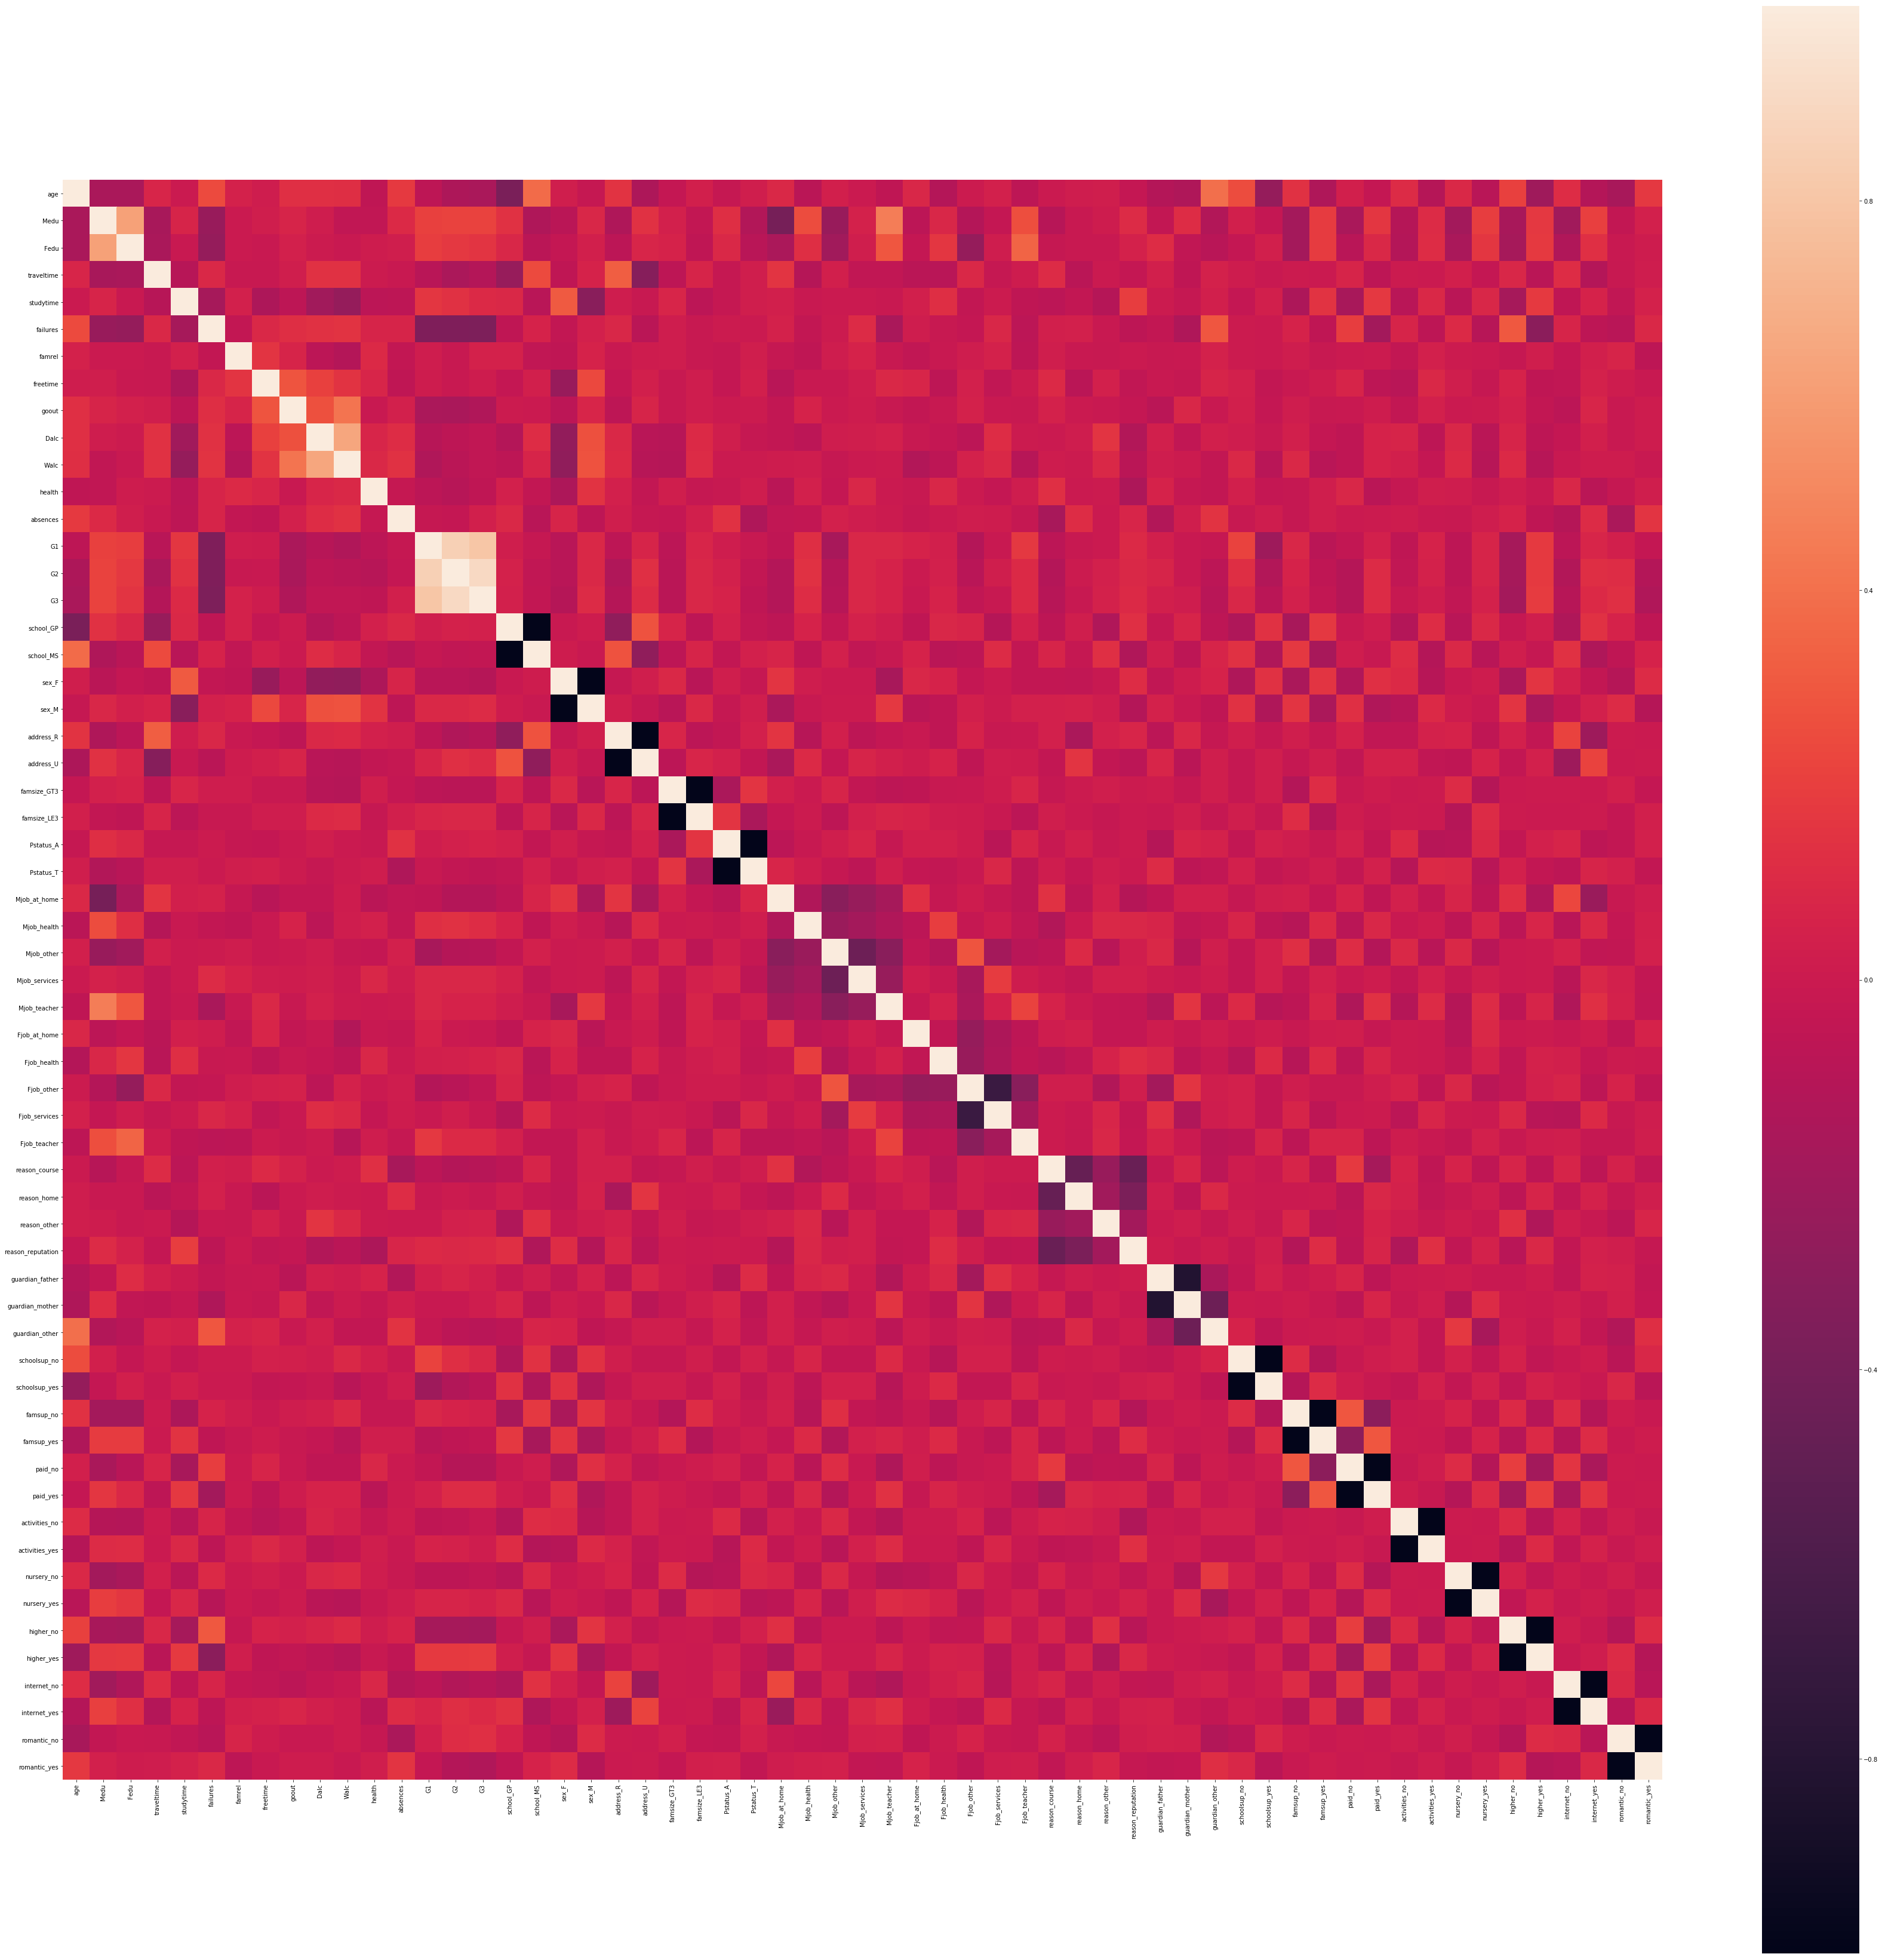

G3                   1.000000
G2                   0.904868
G1                   0.801468
failures             0.360415
Medu                 0.217147
higher_yes           0.182465
higher_no            0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_no          0.129970
romantic_yes         0.129970
traveltime           0.117142
Mjob_health          0.116158
Mjob_at_home         0.115634
address_U            0.105756
address_R            0.105756
sex_F                0.103456
sex_M                0.103456
paid_yes             0.101996
paid_no              0.101996
reason_course        0.098950
internet_no          0.098483
internet_yes         0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup_no         0.082788
schoolsup_yes        0.082788
famsize_GT3          0.081407
famsize_LE3          0.081407
Mjob_servi

In [185]:
#create the dummy variables for the categorical variables
dummy = pd.get_dummies(df)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    '''drop the list of redundant pairs and get the highest correlations'''
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

mostcorr = get_top_abs_correlations(dummy, 50)
print(mostcorr)

plt.figure(figsize=(60,60))
sns.heatmap(dummy.corr(), vmax=1, square=True)
plt.show()
dumcorr = dummy.corr()['G3'].abs().sort_values(ascending=False)
print(dumcorr)

From the correlation heatmap and the list of correlations to our output variable we can pick out our 5 variables to model with.  We want to select 2 categorical variables and 3 continuous.  Let's grab the ***higher*** variable and the ***romantic*** variable for our 2 categorical and ***Failures***, ***Medu***, and ***age*** as the continuous variables.

In [136]:
finaldf = df.loc[:,['higher', 'romantic', 'failures', 'Medu', 'age', 'G3']]
print(finaldf.head())

  higher romantic  failures  Medu  age  G3
0    yes       no         0     4   18   6
1    yes       no         0     1   17   6
2    yes       no         3     1   15  10
3    yes      yes         0     4   15  15
4    yes       no         0     3   16  10


 Let's combine Mother's education and Father's education into one variable = Parents education.  The scale for MEDU and FEDU are the same thus we will not need to standarize.

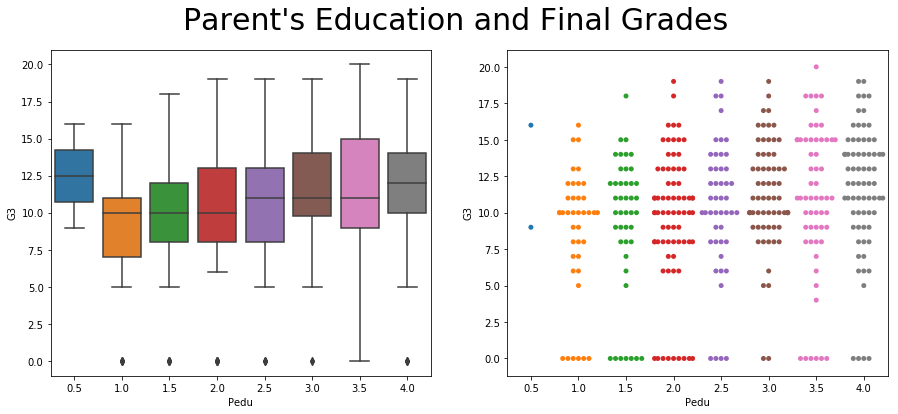

          failures      Medu       age        G3      Pedu
failures  1.000000 -0.236680  0.243665 -0.360415 -0.270293
Medu     -0.236680  1.000000 -0.163658  0.217147  0.901584
age       0.243665 -0.163658  1.000000 -0.161579 -0.181527
G3       -0.360415  0.217147 -0.161579  1.000000  0.205224
Pedu     -0.270293  0.901584 -0.181527  0.205224  1.000000


In [190]:
finaldf['Pedu'] = (df['Medu'] + df['Fedu'])/2
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
sns.boxplot(x='Pedu', y='G3', data=finaldf)
plt.suptitle("Parent's Education and Final Grades", fontsize=30)
fig.add_subplot(122)
sns.swarmplot(x='Pedu', y='G3', data=finaldf)
plt.show()

parentcorr = finaldf.corr()
print(parentcorr)

We can see that the combined parents education correlates very well with the Mother's education.  There is a slight increasing trend with final grades and parents education.

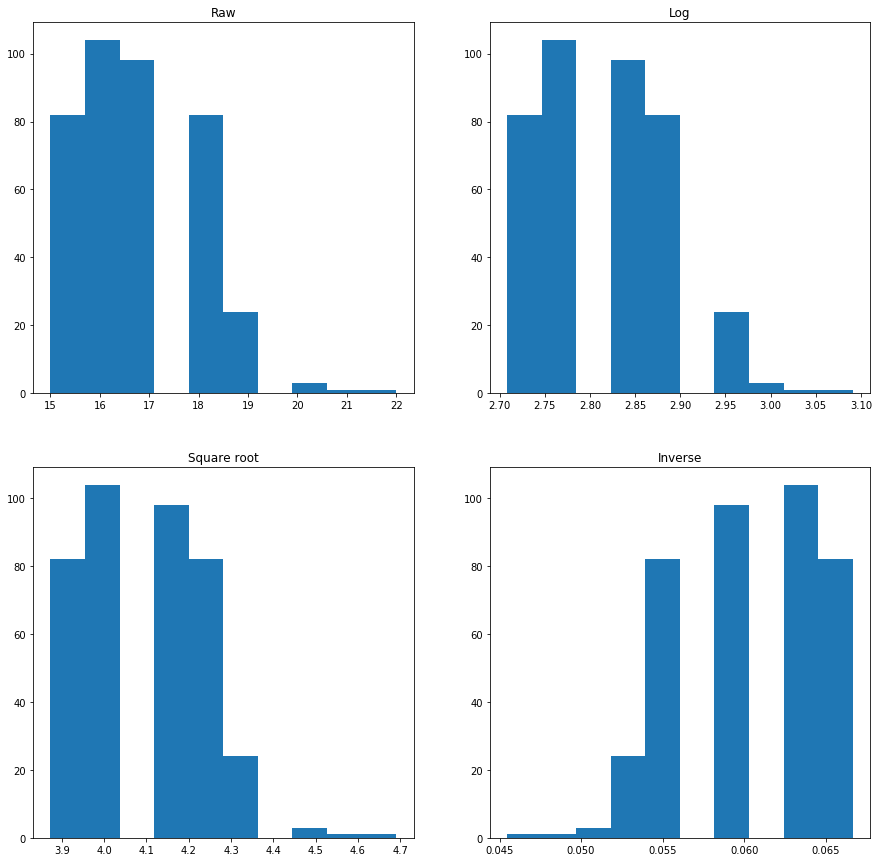

In [168]:
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(221)
plt.hist(finaldf['age'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(finaldf['age']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(finaldf['age']))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/finaldf['age'])
plt.title('Inverse')
plt.show()

None of these distributions look great.

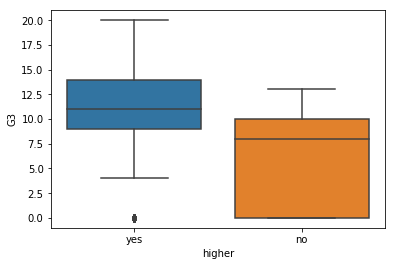

3.6789813059254306 0.0002668001587281805


In [186]:
sns.boxplot(x=finaldf['higher'], y=finaldf['G3'])
plt.show()

t,p = stats.ttest_ind(finaldf[finaldf['higher']=='yes']['G3'], finaldf[finaldf['higher']=='no']['G3'])
print(t,p)

We can see that the students who do want go into higher education score better.

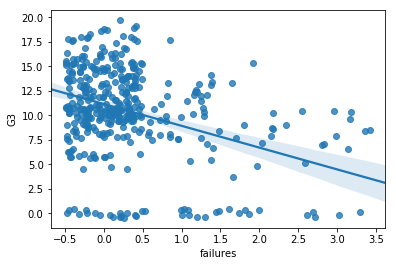

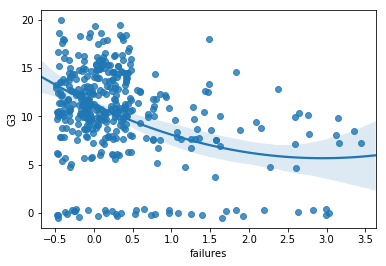

In [188]:
sns.regplot(x=finaldf['failures'], y=finaldf['G3'], x_jitter=.49, y_jitter=.49, order=1)
plt.show()
sns.regplot(x=finaldf['failures'], y=finaldf['G3'], x_jitter=.49, y_jitter=.49, order=2)
plt.show()

The error looks larger with the second order plot, therefore we will not use a square term.

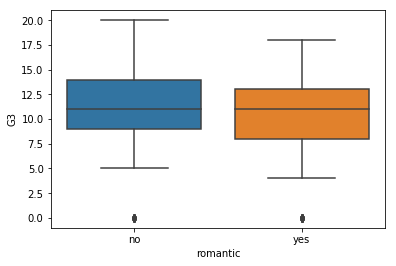

-2.598595332345276 0.009712726394119265


In [189]:
sns.boxplot(x=finaldf['romantic'], y=finaldf['G3'])
plt.show()

t,p = stats.ttest_ind(finaldf[finaldf['romantic']=='yes']['G3'], finaldf[finaldf['romantic']=='no']['G3'])
print(t,p)

Students without romantic relationships score higher.

Still need to make more features....